# Lista Aberta do Módulo 4 - Comparando Classificadores

**Regras para envio:**

1. Faça uma cópia deste arquivo
2. Deixe o arquivo aberto para qualquer pessoa com o link (Share > Anyone with the link)
3. Garanta que as saídas do notebook estão salvas (Settings > deixe desligada a opção (New notebooks use private outputs (omit outputs when saving)), e acesse o link depois em outro navegador para garantir que estão!)
4. Digite seu nome ##AQUI###
5. Após finalizar o exercício, poste o link (apenas o link!) no moodle.

**Atenção**: como temos pouco tempo para o fechamento do semestre, por favor garantam que seus links estão corretos! Não teremos tempo para correções. É essencial que os alunos de ICD saibam usar o Google Colab.

## Identificação de malignidade em tumores de mama - UCI ML Breast Cancer Wisconsin (Diagnostic)

Neste trabalho você deverá realizar uma comparação entre o k-Nearest Neighbors (KNN) e o Random Forest para classificação de pacientes com tumores na mama (maligno = 1 vs benigno = 0). Para isso, usaremos o dataset de câncer de mama de UCI (já embutido no sklearn).

A avaliação dos métodos deverá ser feito usando precisão, revocação e F1. Você também deve reportar a matriz de confusão.

Você não precisa implementar os métodos, já que estão disponíveis na biblioteca scikit-learn da linguagem Python. Se necessário, pode fazer mais importações de bibliotecas.

## Importando módulos e baixando dataset

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data,columns =[cancer.feature_names])

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
#Para acessar as labels
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
#Pegar as colunas que serão usadas na classificação
features = df.columns

# Número de folds da validação cruzada
SPLITS = 5

Se tiver dúvidas sobre a validação cruzada, recomendo :https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e . Para regressão, vocês usaram o kfold, agora recomendo a utilização do StratifiedKFold.

In [ ]:
class Test:
    def __init__(self,y_pred,y_true):
        self.y_pred = y_pred
        self.y_true = y_true


    def metric(self,y_true, y_pred):
        accuracy = cross_val_score(forest, X, y, cv=5, scoring='accuracy')
        precision = cross_val_score(forest, X, y, cv=5, scoring='precision')
        recall = cross_val_score(forest, X, y, cv=5, scoring='recall')
        f1 = cross_val_score(forest, X, y, cv=5, scoring='f1_macro')
        report_table = {
            'Accuracy': [round(np.mean(accuracy), 3)],
            'Precision': [round(np.mean(precision), 3)],
            'Recall': [round(np.mean(recall), 3)],
            'F1 Score':[ round(np.mean(f1), 3)],
        }

        report_table_df = pd.DataFrame(report_table)

        fig, ax = plt.subplots(figsize=(20, 1))
        ax.axis('tight')
        ax.axis('off')

        table = ax.table(cellText=report_table_df.values, colLabels=report_table_df.columns, cellLoc='center', loc='center')
        table.scale(1,2)

        for key, cell in table.get_celld().items():
            if key[0] == 0:
                cell.set_text_props(weight='bold')
        plt.show()

    def fit(self):
        self.metric(self.y_true,self.y_pred)
        return

# Exercício 01:

Use o RandomForest para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:
* Varie a o número de árvores (n_estimators) e a profundidade máxima da árvore (n_estimators). Faça pelo menos 4 configurações.
* Realize validação cruzada, com k-fold igual a 5
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


10 estimadores e profundidade máxima 6


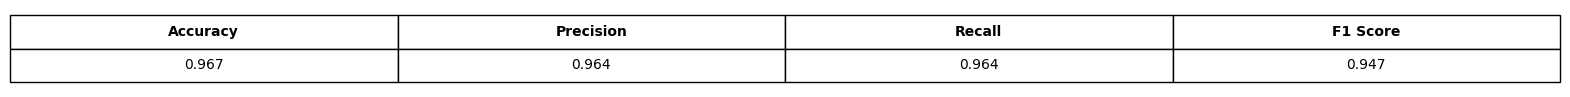

10 estimadores e profundidade máxima 16


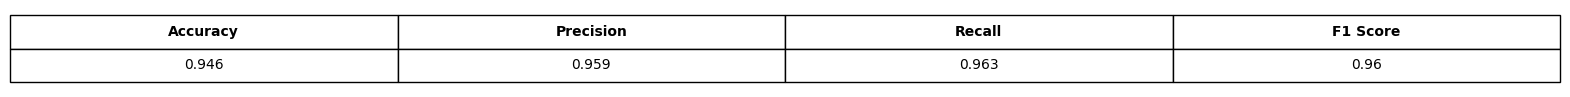

20 estimadores e profundidade máxima 6


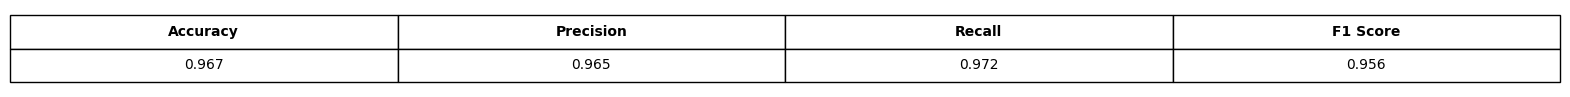

20 estimadores e profundidade máxima 16


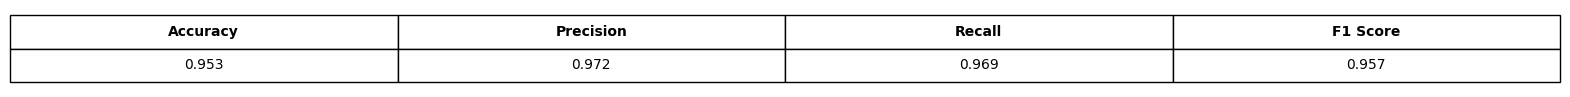

In [ ]:
n_est = [10, 20]
n_deps = [6, 16]
X = df[features]
y = cancer.target

for i, e in enumerate(n_est):
  for j, m in enumerate(n_deps):
    print(f"{e} estimadores e profundidade máxima {m}")
    forest = RandomForestClassifier(n_estimators=e, max_depth=m)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    evaluate = Test(y_pred,y_test)
    evaluate.fit()





# Exercício 02:

Use a knn para classificar as pacientes com e sem câncer.

Para a questão, faça as seguintes tarefas:

* Escolha e reporte resultados com 3 números de vizinhos diferentes (k)
* Realize validação cruzada, com k-fold igual a 5 (para cada um dos k vizinhos)
* Reporte a precisão, revocação, F1 e a matriz de confusão para cada configuração


5 vizinhos


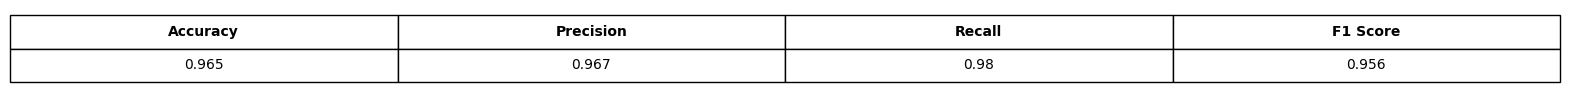

10 vizinhos


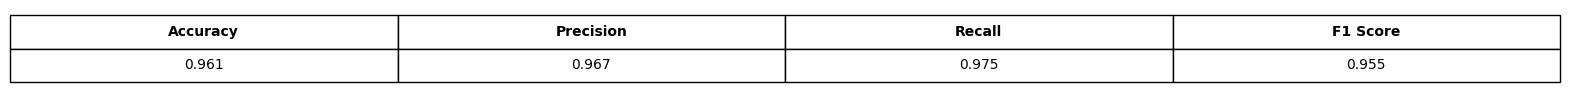

100 vizinhos


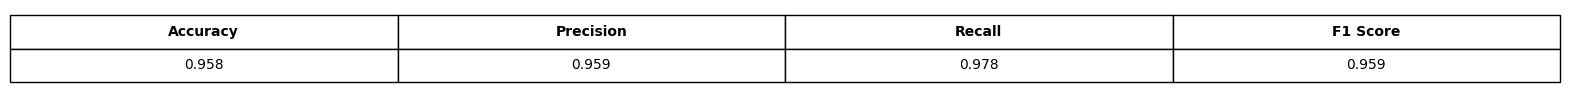

In [ ]:
k_neighbors = [1, 10, 100]
X = df[features]
y = cancer.target

metrics = []
for i, n in enumerate(k_neighbors):
    print(f"{n} vizinhos")
    knn = KNeighborsClassifier(n_neighbors=n)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)


    evaluate = Test(y_pred,y_test)
    evaluate.fit()


# Exercício 03:

Compare os resultados (F1 de cada método com cada configuração) em um gráfico. Qual foi o melhor método? Houve diferença significativa com as variações de parâmetros?

Em todos os casos a F1 ficou bem similar, até mesmo com k=1 na knn, significando que a divisão nesse dataset é bem definida e simples de ser aprendida. O melhor de todos os casos foi a random forest com 10 estimadores e profundidade máxima 16.


# Exercício 04:

Escolha a melhor configuração/método e refaça o modelo, agora usando apenas 5 features. (Você pode selecionar aleatoriamente ou usar alguma metodologia de feature selection). O que aconteceu com a F1? Por quê?

In [ ]:
df.columns[0:5]


MultiIndex([(    'mean radius',),
            (   'mean texture',),
            ( 'mean perimeter',),
            (      'mean area',),
            ('mean smoothness',)],
           )

Escolhi as 5 primeiras de forma aleatória para testar.

In [ ]:
features = df.columns[0:5]


10 estimadores e profundidade máxima 6


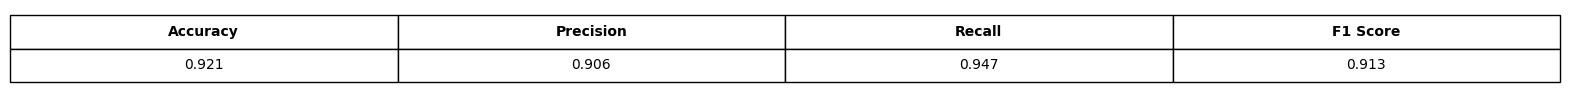

In [ ]:
n_est = [10]
n_deps = [6]
X = df[features]
y = cancer.target

for i, e in enumerate(n_est):
  for j, m in enumerate(n_deps):
    print(f"{e} estimadores e profundidade máxima {m}")
    forest = RandomForestClassifier(n_estimators=e, max_depth=m)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

    evaluate = Test(y_pred,y_test)
    evaluate.fit()

A F1 abaixou bastante comparada aos 5 métodos, todavia continua alta. Dessa forma, podemos inferir que essas 5 features já são necessárias para uma certa divisão entre as classes, mas certas informações de outras colunas ainda seriam necessárias para uma melhor classificação.